#### Data exploration and see what type of research one can do 

In [ ]:
import pandas as pd
import numpy as np
from generate import *

pd.set_option('display.max_columns', None)  # Set to None to display all rows
df = pd.read_csv('/Volumes/LaCie/EPFL/Mastersem3/Semester Project Lsens/Data/Overall/data_compiled.csv')
overall_df = process_area_acronyms(df)
overall_df.to_csv("/Volumes/LaCie/EPFL/Mastersem3/Semester Project Lsens/Data/Overall/complete_data.csv")


display(overall_df)

List of areas without names:
[]


,cluster_id,ccf_acronym,ccf_name,ccf_parent_id,ccf_parent_acronym,ccf_parent_name,spike_times,mouse_id,context,event,pre_spikes,post_spikes,AUC,Transformed AUC,p-values positive,p-values negative,selective,direction,pre_time,post_time,area_acronym
0,1,CA3,Field CA3,375.0,CA,Ammon's horn,[1.10997831e-02 3.79359254e-01 4.41958031e-01 ...,AB120_20240811_143102,active,whisker,[ 4 3 1 1 4 8 4 6 2 4 5 3 2 5 3 ...,[2 3 5 3 7 2 5 6 3 4 4 4 5 6 5 3 2 7 5 5 3 5 5...,0.511540,0.023079,0.823,0.177,False,none,0.2,0.2,CA3
1,1,CA3,Field CA3,375.0,CA,Ammon's horn,[1.10997831e-02 3.79359254e-01 4.41958031e-01 ...,AB120_20240811_143102,passive,whisker,[ 4 3 1 1 4 8 4 6 2 4 5 3 2 5 3 ...,[2 3 5 3 7 2 5 6 3 4 4 4 5 6 5 3 2 7 5 5 3 5 5...,0.511540,0.023079,0.823,0.177,False,none,0.2,0.2,CA3
2,1,CA3,Field CA3,375.0,CA,Ammon's horn,[1.10997831e-02 3.79359254e-01 4.41958031e-01 ...,AB120_20240811_143102,active,auditory,[ 6 4 3 5 5 3 4 1 4 3 1 6 6 2 2 ...,[ 1 2 0 5 6 5 2 4 1 10 6 2 5 3 7 ...,0.511540,0.023079,0.381,0.619,False,none,0.2,0.2,CA3
3,1,CA3,Field CA3,375.0,CA,Ammon's horn,[1.10997831e-02 3.79359254e-01 4.41958031e-01 ...,AB120_20240811_143102,passive,auditory,[ 6 4 3 5 5 3 4 1 4 3 1 6 6 2 2 ...,[ 1 2 0 5 6 5 2 4 1 10 6 2 5 3 7 ...,0.511540,0.023079,0.381,0.619,False,none,0.2,0.2,CA3
4,1,CA3,Field CA3,375.0,CA,Ammon's horn,[1.10997831e-02 3.79359254e-01 4.41958031e-01 ...,AB120_20240811_143102,active,wh_vs_aud,[ 0 5 2 6 3 1 6 6 7 5 5 5 4 5 4 ...,[ 1 0 3 2 5 2 7 2 2 3 1 0 3 1 3 ...,0.469161,-0.061678,0.255,0.745,False,none,0.2,0.2,CA3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69764,621,MOs5,"Secondary motor area, layer 5",993.0,MOs,Secondary motor area,[1647.86970883 1946.42382134 1960.57315656 196...,AB116_20240724_102941,active,auditory,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,0.498759,-0.002481,0.743,0.763,False,none,0.2,0.2,MOs
69765,621,MOs5,"Secondary motor area, layer 5",993.0,MOs,Secondary motor area,[1647.86970883 1946.42382134 1960.57315656 196...,AB116_20240724_102941,passive,auditory,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,0.498759,-0.002481,0.743,0.763,False,none,0.2,0.2,MOs
69766,621,MOs5,"Secondary motor area, layer 5",993.0,MOs,Secondary motor area,[1647.86970883 1946.42382134 1960.57315656 196...,AB116_20240724_102941,active,wh_vs_aud,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,0.502592,0.005183,0.826,0.685,False,none,0.2,0.2,MOs
69767,621,MOs5,"Secondary motor area, layer 5",993.0,MOs,Secondary motor area,[1647.86970883 1946.42382134 1960.57315656 196...,AB116_20240724_102941,passive,wh_vs_aud,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,0.502592,0.005183,0.826,0.685,False,none,0.2,0.2,MOs


In [6]:
dfsee = pd.read_parquet('/Volumes/LaCie/EPFL/Mastersem3/Semester Project Lsens/Data/AB126_20240822_114405/AB126_20240822_114405_Selectivity_Dataframe2.parquet')

In [ ]:
def preprocessing(nwbfile):
    """
    Preprocesses the NWB file to filter units and prepare trials data for further analysis.

    Parameters:
    - nwbfile (NWBFile): The NWB file containing the units and trials data.

    Returns:
    - filtered_units (DataFrame): Filtered DataFrame of units based on specific criteria, 
                                  containing only selected columns.
    - trials (DataFrame): DataFrame containing the trials data.
    """

    # Convert NWB units and trials tables into Pandas DataFrames
    units = nwbfile.units.to_dataframe()
    trials = nwbfile.trials.to_dataframe()

    # Preprocessing 
    filtered_units = units[(units['bc_label'] == 'good') & (units['ccf_acronym'].str.contains('[A-Z]'))]

    # Some chosen columns
    cons_columns  = ["cluster_id", "firing_rate", "ccf_acronym", "ccf_name", "ccf_parent_acronym", "ccf_parent_id","ccf_parent_name", "spike_times"]
    filtered_units = filtered_units[cons_columns]

    return filtered_units, trials

In [7]:
dfsee

,cluster_id,firing_rate,ccf_acronym,ccf_name,ccf_parent_acronym,ccf_parent_id,ccf_parent_name,spike_times,whisker_passive_pre_spikes,whisker_passive_post_spikes,whisker_active_pre_spikes,whisker_active_post_spikes,auditory_passive_pre_spikes,auditory_passive_post_spikes,auditory_active_pre_spikes,auditory_active_post_spikes,spontaneous_licks_pre_spikes,spontaneous_licks_post_spikes,pre_time,post_time,mouse_id
0,83,12.19671911,CP,Caudoputamen,STRd,485.0,Striatum dorsal region,"[0.3001274689179365, 0.3313601919717022, 0.751...","[10, 0, 0, 12, 13, 7, 0, 0, 2, 9, 0, 1, 1, 4, ...","[4, 3, 3, 2, 1, 3, 6, 3, 3, 1, 2, 8, 2, 4, 0, ...","[0, 2, 0, 1, 1, 1, 1, 0, 1, 4, 1, 4, 5, 0, 1, ...","[6, 5, 7, 2, 11, 4, 2, 4, 4, 2, 0, 2, 16, 11, ...","[0, 1, 2, 1, 0, 0, 0, 2, 0, 4, 0, 0, 1, 1, 1, ...","[3, 2, 5, 2, 1, 6, 2, 3, 3, 1, 0, 4, 1, 2, 3, ...","[3, 0, 3, 7, 6, 12, 1, 0, 2, 10, 0, 6, 5, 3, 1...","[1, 1, 1, 6, 5, 0, 1, 0, 6, 1, 8, 3, 2, 2, 10,...","[3, 4, 0, 4, 1, 2, 3, 0, 1, 2, 3, 2, 3, 0, 2, ...","[1, 0, 1, 1, 2, 0, 1, 1, 1, 1, 0, 11, 1, 1, 2,...",0.2,0.2,AB126_20240822_114405
1,86,11.55800213,CP,Caudoputamen,STRd,485.0,Striatum dorsal region,"[0.5018235278275804, 0.6697869125318765, 0.797...","[1, 0, 1, 1, 4, 1, 3, 3, 0, 1, 2, 2, 3, 1, 5, ...","[3, 1, 6, 4, 2, 2, 3, 3, 2, 3, 1, 3, 1, 2, 11,...","[1, 2, 1, 3, 0, 0, 1, 0, 2, 4, 5, 3, 1, 2, 4, ...","[6, 3, 4, 6, 2, 6, 3, 7, 5, 1, 2, 2, 4, 5, 2, ...","[1, 5, 4, 1, 0, 1, 8, 2, 0, 3, 1, 1, 1, 1, 1, ...","[1, 5, 6, 1, 0, 1, 5, 4, 2, 0, 0, 2, 0, 1, 1, ...","[2, 1, 1, 0, 1, 1, 2, 2, 6, 0, 2, 2, 1, 0, 3, ...","[1, 2, 3, 0, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 5, ...","[4, 1, 2, 2, 1, 5, 2, 1, 4, 6, 2, 0, 1, 2, 2, ...","[4, 5, 1, 1, 6, 3, 2, 2, 0, 7, 2, 0, 1, 0, 5, ...",0.2,0.2,AB126_20240822_114405
2,87,7.47356948,CP,Caudoputamen,STRd,485.0,Striatum dorsal region,"[0.035265977578318175, 0.06043215250424466, 0....","[0, 1, 2, 1, 1, 0, 0, 1, 2, 1, 0, 3, 3, 2, 1, ...","[6, 5, 5, 4, 5, 7, 11, 5, 6, 9, 6, 6, 6, 4, 3,...","[0, 3, 1, 1, 2, 0, 0, 2, 1, 2, 1, 1, 1, 4, 2, ...","[6, 3, 3, 6, 7, 4, 4, 4, 4, 2, 0, 2, 5, 4, 3, ...","[1, 2, 3, 0, 0, 1, 1, 5, 0, 3, 1, 0, 2, 0, 2, ...","[5, 2, 1, 3, 3, 2, 1, 2, 5, 3, 3, 3, 1, 5, 4, ...","[2, 1, 1, 2, 2, 1, 1, 0, 1, 0, 2, 2, 1, 3, 0, ...","[4, 2, 3, 2, 4, 3, 1, 2, 3, 8, 5, 5, 3, 3, 6, ...","[3, 4, 4, 5, 3, 4, 1, 1, 1, 3, 3, 1, 2, 0, 4, ...","[2, 2, 4, 3, 2, 4, 2, 4, 1, 4, 2, 0, 4, 4, 2, ...",0.2,0.2,AB126_20240822_114405
3,88,1.24279824,CP,Caudoputamen,STRd,485.0,Striatum dorsal region,"[0.4228917368016282, 0.8013843411511583, 0.853...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, ...",0.2,0.2,AB126_20240822_114405
4,89,5.87215177,CP,Caudoputamen,STRd,485.0,Striatum dorsal region,"[0.46215763622247774, 0.7446521163512552, 1.47...","[1, 1, 2, 1, 1, 2, 3, 2, 3, 1, 1, 1, 1, 0, 0, ...","[2, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 0, ...","[1, 1, 1, 2, 0, 1, 1, 0, 0, 0, 2, 3, 1, 1, 1, ...","[1, 0, 2, 1, 1, 0, 1, 0, 0, 0, 2, 2, 1, 0, 2, ...","[1, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1, 0, 1, 2, ...","[0, 0, 2, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, ...","[2, 0, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 2, 0, 0, ...","[1, 1, 1, 0, 2, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, ...","[0, 0, 0, 2, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...","[0, 2, 0, 0, 3, 1, 1, 1, 2, 0, 1, 2, 1, 1, 0, ...",0.2,0.2,AB126_20240822_114405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,778,2.46946179,ACAd6a,"Anterior cingulate area, dorsal part, layer 6a",ACAd,39.0,"Anterior cingulate area, dorsal part","[0.30082799670558874, 1.62850083

In [ ]:
import pandas as pd
import numpy as np
from generate import *

pd.set_option('display.max_columns', None)  # Set to None to display all rows
df = pd.read_csv('/Volumes/LaCie/EPFL/Mastersem3/Semester Project Lsens/Data/Overall/overall_combined.csv')
len(df.mouse_id.unique())

array(['AB120_20240811_143102', 'AB121_20240813_125401',
       'AB124_20240815_111810', 'AB125_20240817_123403',
       'AB126_20240822_114405', 'AB130_20240902_123634',
       'AB129_20240828_112850', 'AB128_20240829_112813',
       'AB127_20240821_103757', 'AB123_20240806_110231',
       'AB122_20240804_134554', 'AB119_20240731_102619',
       'AB117_20240723_125437', 'AB116_20240724_102941',
       'AB077_20230531_143839', 'AB080_20230622_152205',
       'AB082_20230630_101353', 'AB085_20231005_152636',
       'AB086_20231015_141742', 'AB087_20231017_141901',
       'AB092_20231205_140109', 'AB093_20231207_111207',
       'AB095_20231212_141728', 'AB102_20240309_114107',
       'AB104_20240313_145433', 'AB107_20240318_121423'], dtype=object)

In [5]:
df.columns.tolist()

['cluster_id',
 'ccf_acronym',
 'ccf_name',
 'ccf_parent_id',
 'ccf_parent_acronym',
 'ccf_parent_name',
 'spike_times',
 'mouse_id',
 'context',
 'event',
 'pre_spikes',
 'post_spikes',
 'AUC',
 'Transformed AUC',
 'p-values positive',
 'p-values negative',
 'selective',
 'direction',
 'pre_time',
 'post_time',
 'area_acronym',
 'has context']

In [ ]:
overall_df.columns.tolist()

['cluster_id',
 'ccf_acronym',
 'ccf_name',
 'ccf_parent_id',
 'ccf_parent_acronym',
 'ccf_parent_name',
 'spike_times',
 'mouse_id',
 'context',
 'event',
 'pre_spikes',
 'post_spikes',
 'AUC',
 'Transformed AUC',
 'p-values positive',
 'p-values negative',
 'selective',
 'direction',
 'pre_time',
 'post_time']

In [6]:
overall_df['mouse_id'].unique()

array(['AB120_20240811_143102', 'AB121_20240813_125401',
       'AB124_20240815_111810', 'AB125_20240817_123403',
       'AB126_20240822_114405', 'AB130_20240902_123634',
       'AB129_20240828_112850', 'AB128_20240829_112813',
       'AB127_20240821_103757', 'AB123_20240806_110231',
       'AB122_20240804_134554', 'AB119_20240731_102619',
       'AB117_20240723_125437', 'AB116_20240724_102941'], dtype=object)

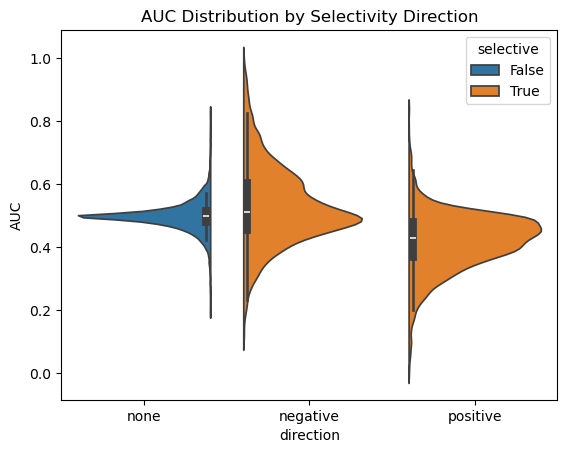

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(data=overall_df, x='direction', y='AUC', hue='selective', split=True)
plt.title('AUC Distribution by Selectivity Direction')
plt.show()

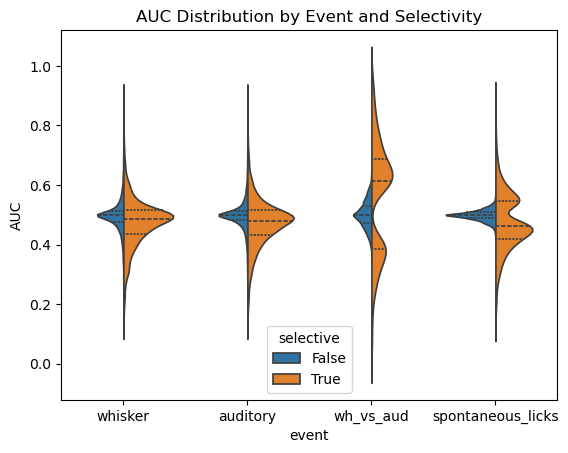

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a violin plot with the event as hue, split by selectivity
sns.violinplot(data=overall_df, x='event', y='AUC', hue='selective', split=True, inner='quart')
plt.title('AUC Distribution by Event and Selectivity')
plt.show()


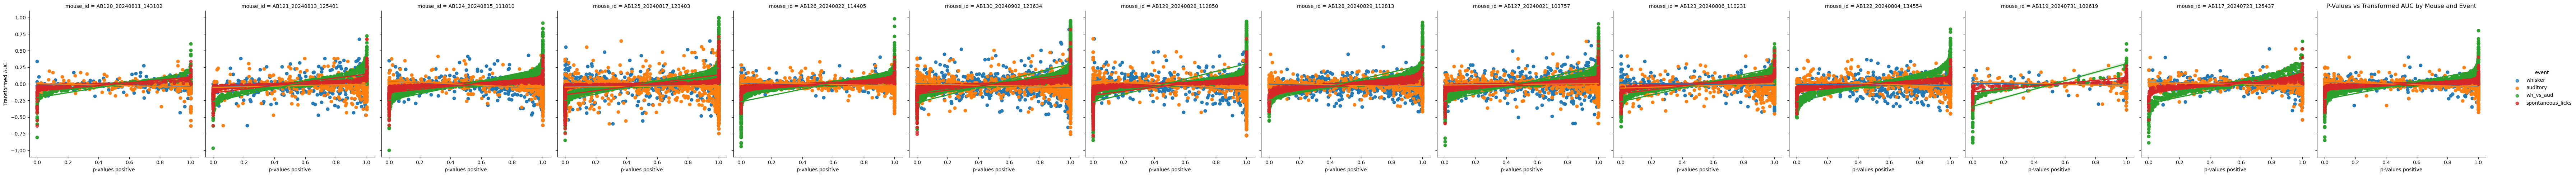

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(data=overall_df, x='p-values positive', y='Transformed AUC', hue='event', col='mouse_id')
plt.title('P-Values vs Transformed AUC by Mouse and Event')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Grouping by mouse_id and counting the 'selective' values
selective_counts = overall_df.groupby('mouse_id')['selective'].value_counts().unstack().fillna(0)

# Plotting for each mouse
for mouse in selective_counts.index:
    counts = selective_counts.loc[mouse]
    
    plt.figure(figsize=(5, 5))
    plt.bar(['Non-Selective', 'Selective'], counts, color=['gray', 'darkred'])
    plt.xlabel('Neuron Type')
    plt.ylabel('Count')
    plt.title(f'Count of Selective vs. Non-Selective Neurons for Mouse {mouse}')
    plt.show()


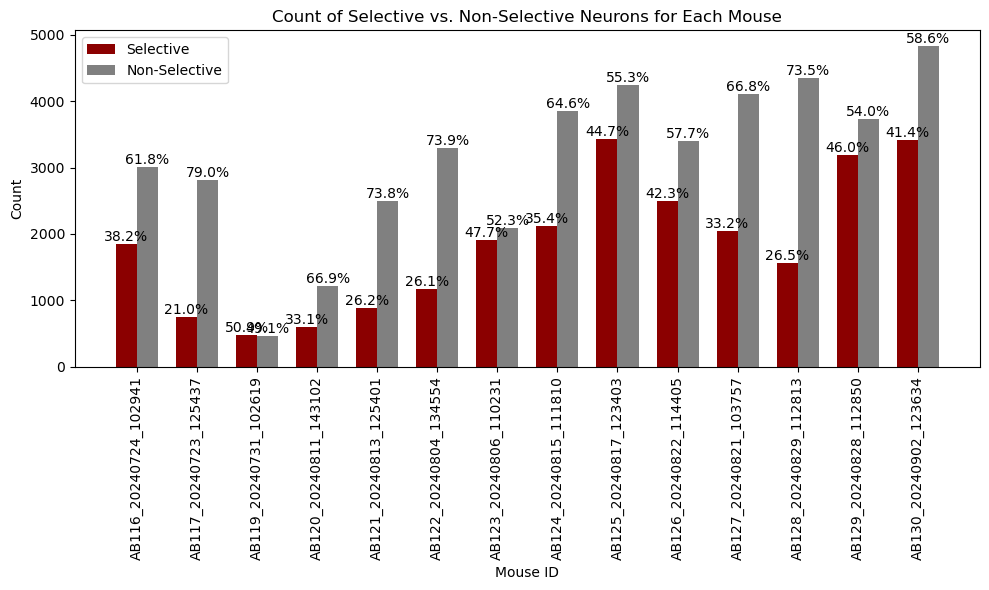

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Grouping by mouse_id and counting the 'selective' values
selective_counts = overall_df.groupby('mouse_id')['selective'].value_counts().unstack().fillna(0)

# Calculate the percentage of selective and non-selective neurons for each mouse
selective_percentage = selective_counts.div(selective_counts.sum(axis=1), axis=0) * 100

# Plotting all mice in the same graph
fig, ax = plt.subplots(figsize=(10, 6))

# Define the positions of the bars on the x-axis
bar_width = 0.35  # Bar width
index = np.arange(len(selective_counts))  # Bar positions

# Plotting Selective and Non-Selective bars for each mouse
bar1 = ax.bar(index - bar_width / 2, selective_counts[True], bar_width, label='Selective', color='darkred')
bar2 = ax.bar(index + bar_width / 2, selective_counts[False], bar_width, label='Non-Selective', color='gray')

# Adding percentage labels on the bars
for i, (selective, non_selective) in enumerate(zip(selective_counts[True], selective_counts[False])):
    # Calculate the percentage for selective and non-selective
    ax.text(index[i] - bar_width / 2, selective + 0.05, f'{selective_percentage.iloc[i, 1]:.1f}%', 
            ha='center', va='bottom', fontsize=10, color='black')  # For Selective
    ax.text(index[i] + bar_width / 2, non_selective + 0.05, f'{selective_percentage.iloc[i, 0]:.1f}%', 
            ha='center', va='bottom', fontsize=10, color='black')  # For Non-Selective

# Adding labels and title
ax.set_xlabel('Mouse ID')
ax.set_ylabel('Count')
ax.set_title('Count of Selective vs. Non-Selective Neurons for Each Mouse')
ax.set_xticks(index)
ax.set_xticklabels(selective_counts.index, rotation=90)  # Rotate mouse_id labels vertically
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


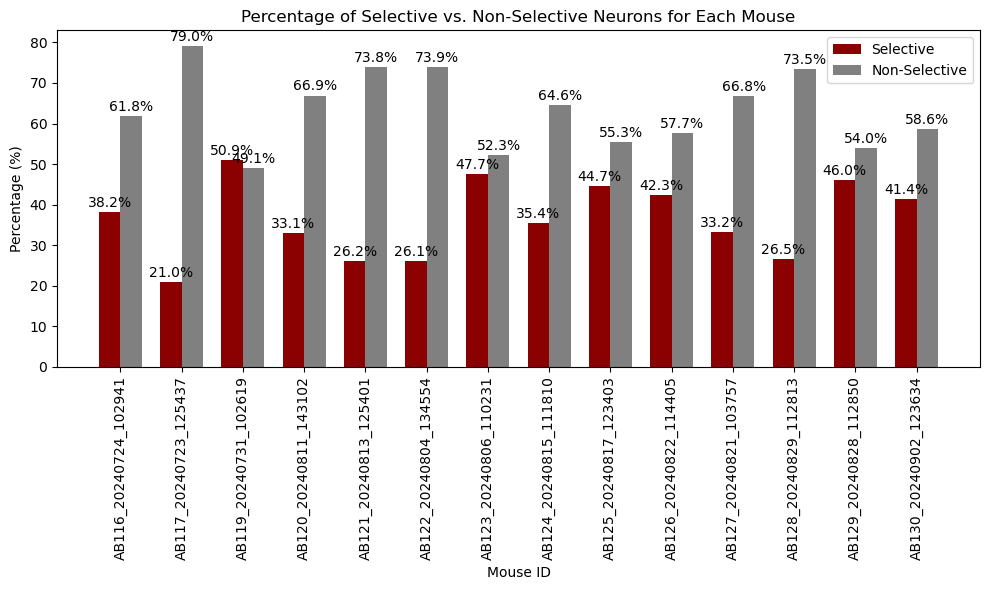

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Grouping by mouse_id and counting the 'selective' values
selective_counts = overall_df.groupby('mouse_id')['selective'].value_counts().unstack().fillna(0)

# Calculate the percentage of selective and non-selective neurons for each mouse
selective_percentage = selective_counts.div(selective_counts.sum(axis=1), axis=0) * 100

# Plotting all mice in the same graph with percentages
fig, ax = plt.subplots(figsize=(10, 6))

# Define the positions of the bars on the x-axis
bar_width = 0.35  # Bar width
index = np.arange(len(selective_counts))  # Bar positions

# Plotting Selective and Non-Selective bars for each mouse based on percentages
bar1 = ax.bar(index - bar_width / 2, selective_percentage[True], bar_width, label='Selective', color='darkred')
bar2 = ax.bar(index + bar_width / 2, selective_percentage[False], bar_width, label='Non-Selective', color='gray')

# Adding percentage labels on the bars
for i, (selective, non_selective) in enumerate(zip(selective_percentage[True], selective_percentage[False])):
    # Display percentage labels on the bars
    ax.text(index[i] - bar_width / 2, selective + 0.5, f'{selective:.1f}%', 
            ha='center', va='bottom', fontsize=10, color='black')  # For Selective
    ax.text(index[i] + bar_width / 2, non_selective + 0.5, f'{non_selective:.1f}%', 
            ha='center', va='bottom', fontsize=10, color='black')  # For Non-Selective

# Adding labels and title
ax.set_xlabel('Mouse ID')
ax.set_ylabel('Percentage (%)')
ax.set_title('Percentage of Selective vs. Non-Selective Neurons for Each Mouse')
ax.set_xticks(index)
ax.set_xticklabels(selective_percentage.index, rotation=90)  # Rotate mouse_id labels vertically
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


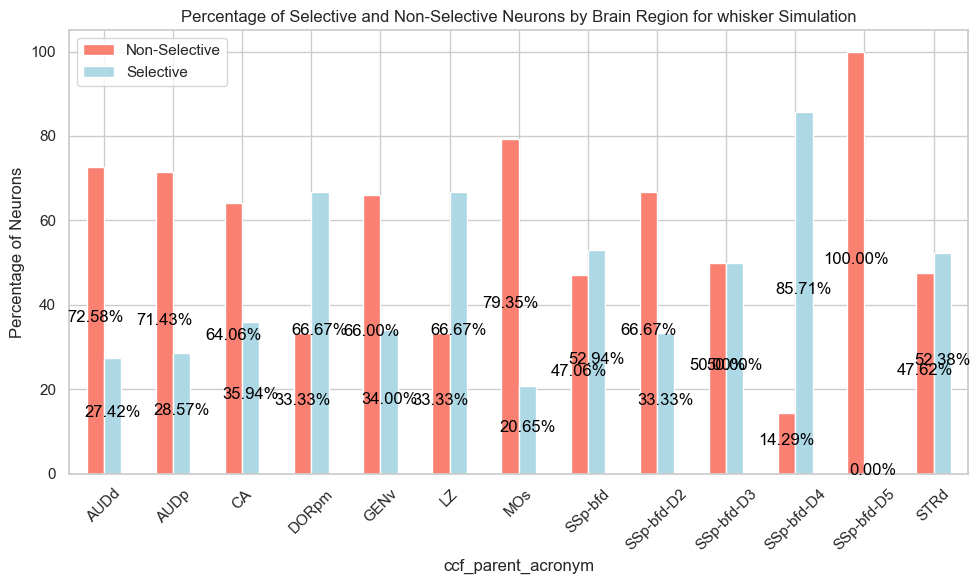

In [ ]:
from plot import *
plot_neuron_percentages(overall_df[overall_df['mouse_id']=='AB124_20240815_111810'], offset=2, category='whisker')
    

/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_74032/3486495529.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


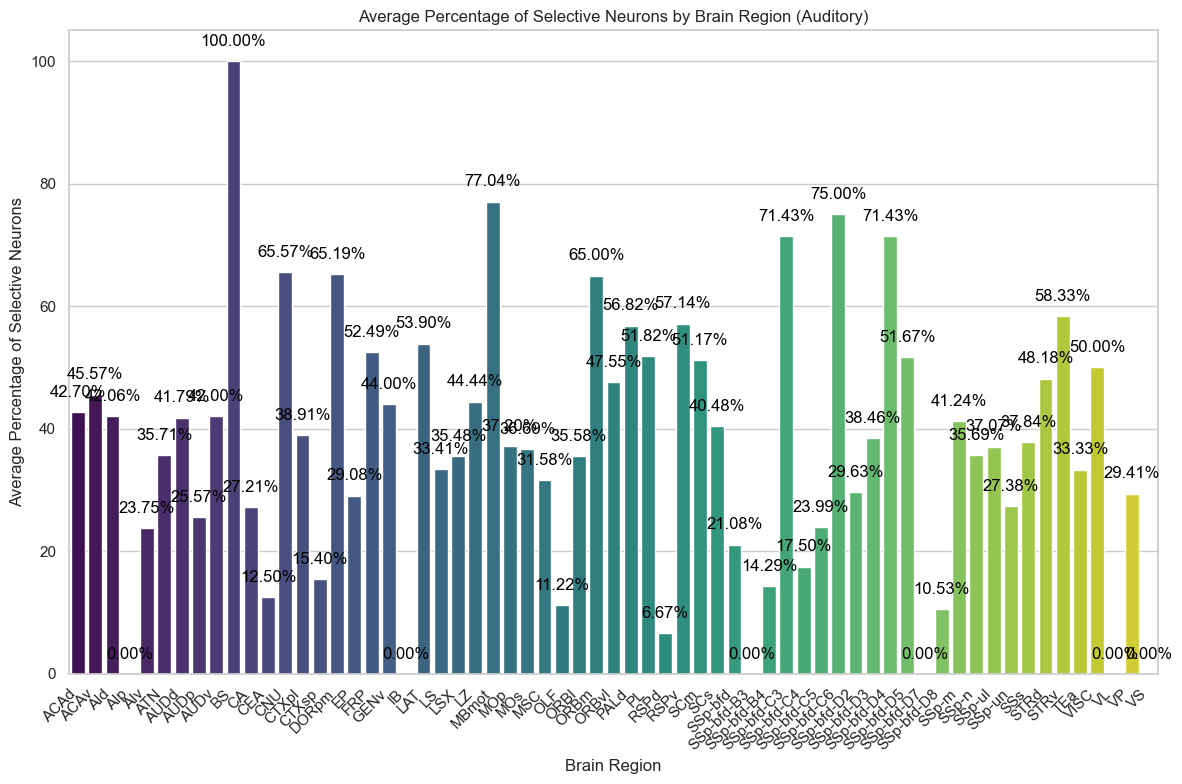

In [41]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def plot_avg_selective_neuron_percentage(df, offset=2, category='whisker', context = 'active'):
    """
    Plots the average percentage of selective neurons per brain region across all mice.
    
    Parameters:
    - df: DataFrame with 'mouse_id', 'ccf_parent_acronym' (brain region), and 'selective'.
    - offset: Distance for percentage annotation above the bars (default=2).
    - category: Filter based on category (default='whisker').
    """

    # Filter by category if not 'all
    df = df[ (df['event'] == category) & (df['context']==context)]

    # Calculate percentage per mouse and brain region
    percentages = df.groupby(['mouse_id', 'ccf_parent_acronym'])['selective'].mean().reset_index()
    percentages['selective'] *= 100  # Convert to percentage

    # Average percentages across mice for each brain region
    avg_percentages = percentages.groupby('ccf_parent_acronym')['selective'].mean().reset_index()

    # Create the bar plot using Seaborn
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(
        data=avg_percentages,
        x='ccf_parent_acronym',
        y='selective',
        palette='viridis'
    )

    # Annotate each bar with its percentage value
    for i, row in avg_percentages.iterrows():
        ax.text(
            i, row['selective'] + offset, f"{row['selective']:.2f}%", 
            ha='center', va='bottom', color='black'
        )

    plt.title(f'Average Percentage of Selective Neurons by Brain Region ({category.capitalize()})')
    plt.ylabel('Average Percentage of Selective Neurons')
    plt.xlabel('Brain Region')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


plot_avg_selective_neuron_percentage(overall_df, offset=2, category='auditory', context='active')


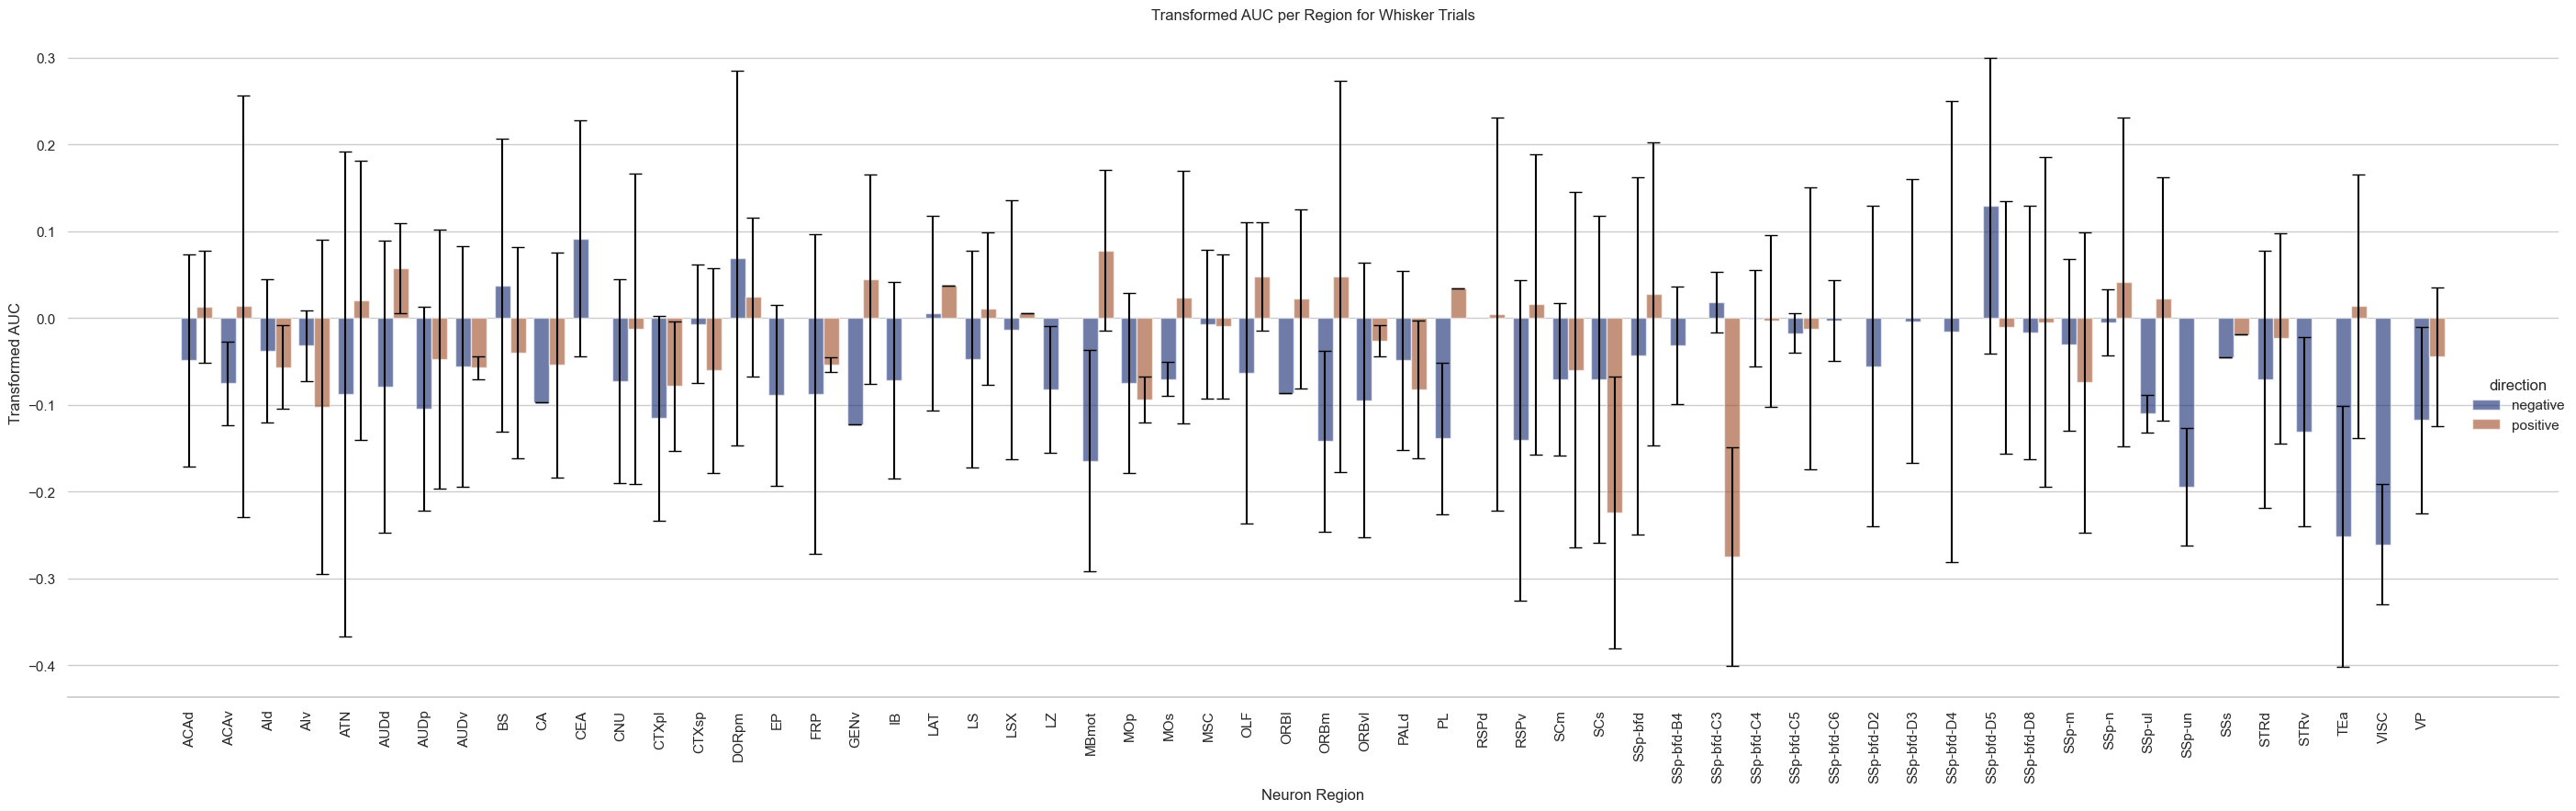

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_avg_transformed_auc(df, category='wh/aud', offset=2):
    """
    Plots the average Transformed AUC per brain region with error bars, split by direction.

    Parameters:
    - df: DataFrame containing columns 'ccf_parent_acronym', 'Transformed AUC', 'direction', 'selective', and 'category'.
    - category: The category of trials to filter (default is 'wh/aud').
    - offset: Minimum vertical distance for error bar annotations (default=2).

    Returns:
    - A Seaborn plot with bars showing the mean Transformed AUC and error bars representing standard deviation.
    """
    # Set Seaborn theme
    sns.set_theme(style="whitegrid")

    # Filter for selective neurons and the specified category
    filtered_df = df[(df['selective'] == True) & (df['event'] == category)]

    # Group by brain region and direction to calculate mean and standard deviation
    grouped_df = (
        filtered_df
        .groupby(['ccf_parent_acronym', 'direction'], as_index=False)
        .agg({'Transformed AUC': ['mean', 'std']})
    )

    # Flatten column names for easier access
    grouped_df.columns = ['ccf_parent_acronym', 'direction', 'Transformed_AUC_mean', 'Transformed_AUC_sd']

    # Plot using Seaborn
    g = sns.catplot(
        data=grouped_df, kind="bar",
        x="ccf_parent_acronym", y="Transformed_AUC_mean", hue="direction",
        palette="dark", alpha=.6, height=9, aspect=3, errorbar=None
    )

    # Add error bars manually
    for ax in g.axes.flat:
        for bar, sd in zip(ax.patches, grouped_df['Transformed_AUC_sd']):
            ax.errorbar(bar.get_x() + bar.get_width() / 2, bar.get_height(), yerr=sd, fmt='none', c='black', capsize=5)

    # Customize plot appearance
    g.despine(left=True)
    g.set_axis_labels("Neuron Region", "Transformed AUC")
    plt.title(f"Transformed AUC per Region for {category.capitalize()} Trials")

    # Rotate x-axis labels for readability
    plt.xticks(rotation=90, ha='right')

    # Adjust layout to prevent clipping
    plt.tight_layout()
    plt.show()


plot_avg_transformed_auc(overall_df, category='whisker')


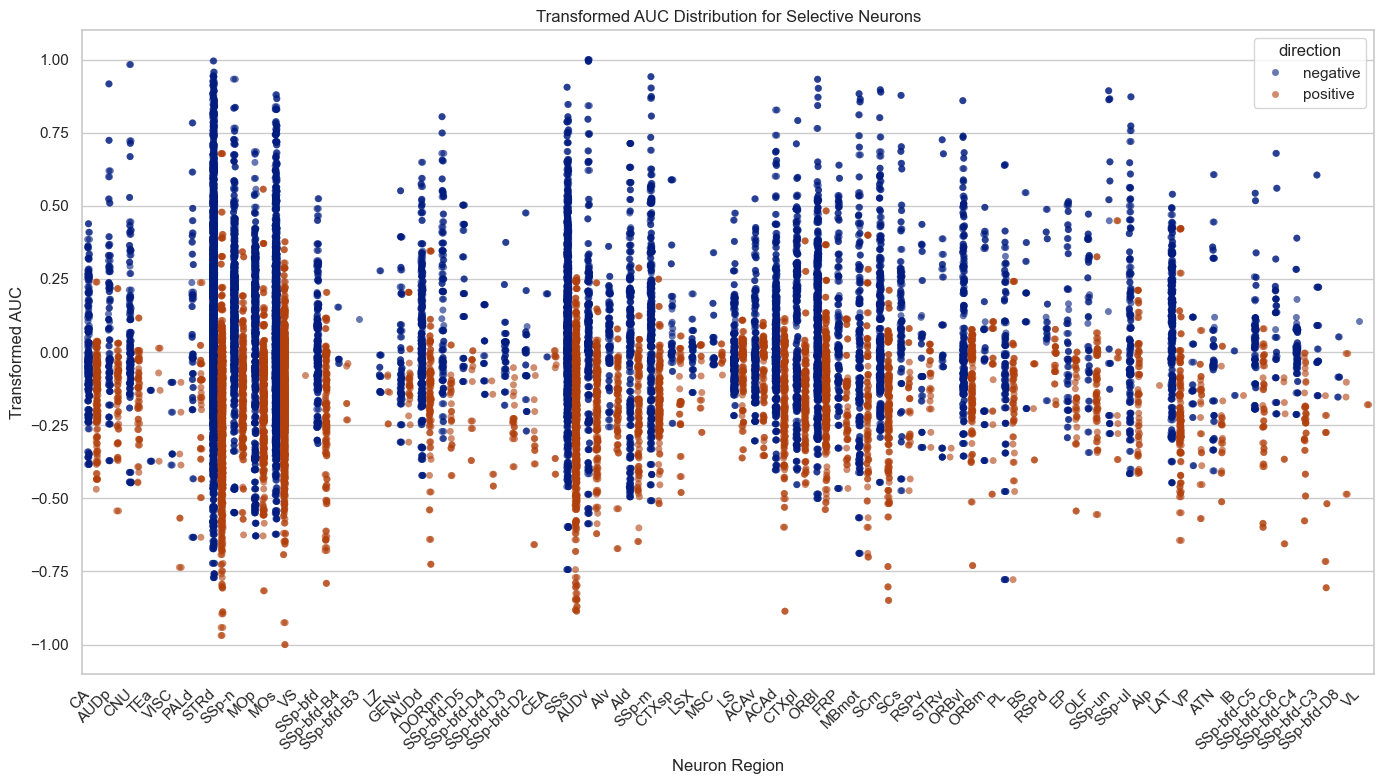

In [17]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8))

sns.stripplot(
    data=overall_df[overall_df['selective'] == True],
    x="ccf_parent_acronym", y="Transformed AUC", hue="direction",
    palette="dark", dodge=True, jitter=True, alpha=0.6
)
plt.title("Transformed AUC Distribution for Selective Neurons")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Neuron Region")
plt.ylabel("Transformed AUC")
plt.tight_layout()
plt.show()


# Some regions, such as SSp-bfd, AUDp, and CTXpl, show a wide spread of AUC values across the range, 
# indicating diverse selectivity. Other regions, such as LZ and GENv, have more tightly clustered AUC values. 
# Positive vs. Negative Selectivity Balance:
#   In certain regions (like AUDp, SSp-n, RSPv), there seems to be a balance between positively and negatively selective neurons.
#   In contrast, some regions (like VL, Sptd) may have a bias towards either positive or negative direction neurons.

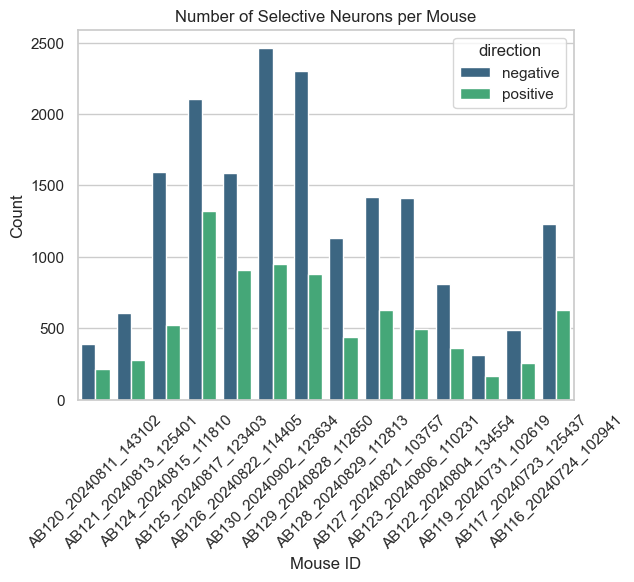

In [18]:
sns.countplot(data=overall_df[overall_df['selective'] == True], x='mouse_id', hue='direction', palette='viridis')
plt.title('Number of Selective Neurons per Mouse')
plt.ylabel('Count')
plt.xlabel('Mouse ID')
plt.xticks(rotation=45)
plt.show()


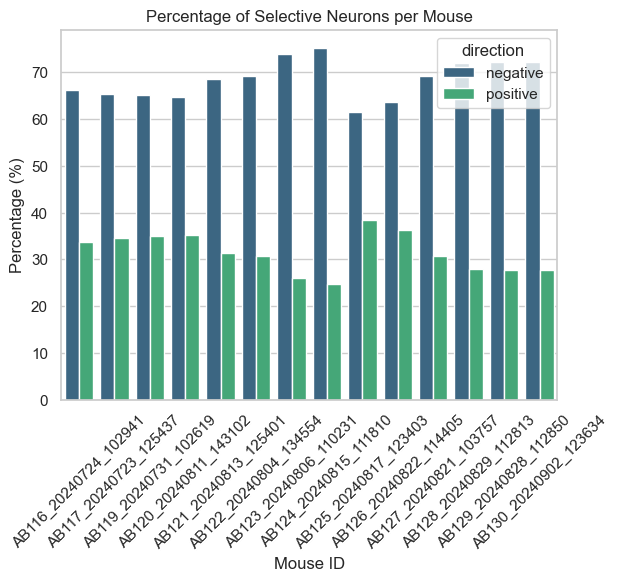

In [19]:
# Step 1: Calculate percentage of selective neurons per mouse_id and direction
selective_counts = overall_df[overall_df['selective'] == True].groupby(['mouse_id', 'direction']).size().reset_index(name='count')

# Step 2: Calculate total selective neurons per mouse_id
total_counts = selective_counts.groupby('mouse_id')['count'].sum().reset_index(name='total')

# Step 3: Merge and calculate percentage
selective_percentages = selective_counts.merge(total_counts, on='mouse_id')
selective_percentages['percentage'] = (selective_percentages['count'] / selective_percentages['total']) * 100

# Step 4: Plot using Seaborn
sns.barplot(data=selective_percentages, x='mouse_id', y='percentage', hue='direction', palette='viridis')
plt.title('Percentage of Selective Neurons per Mouse')
plt.ylabel('Percentage (%)')
plt.xlabel('Mouse ID')
plt.xticks(rotation=45)
plt.show()


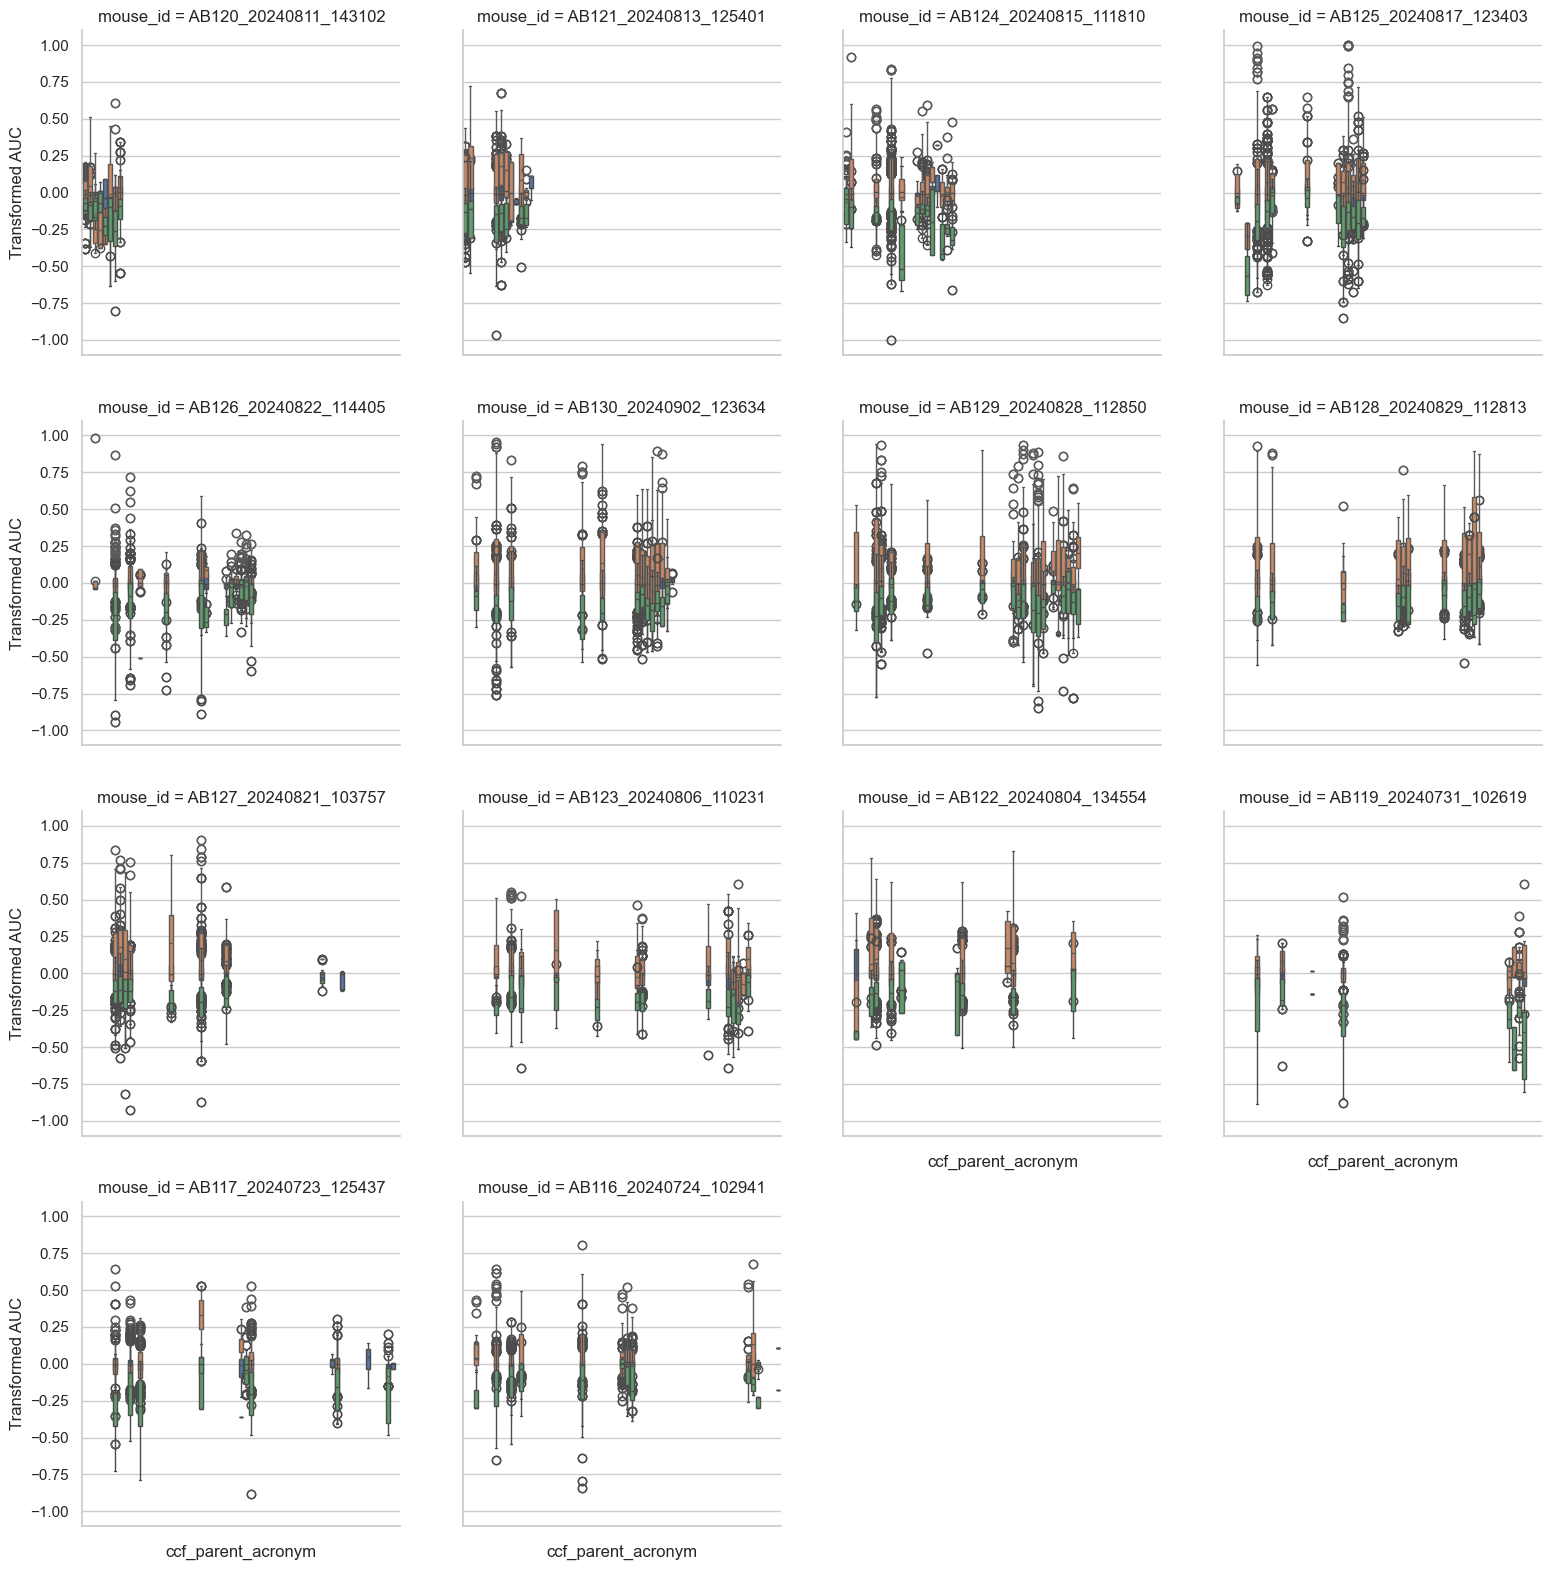

In [20]:
g = sns.FacetGrid(overall_df, col="mouse_id", col_wrap=4, height=4, hue="direction")
g.map(sns.boxplot, "ccf_parent_acronym", "Transformed AUC", order=overall_df['ccf_parent_acronym'].unique())
g.set_xticklabels(rotation=90)
plt.show()


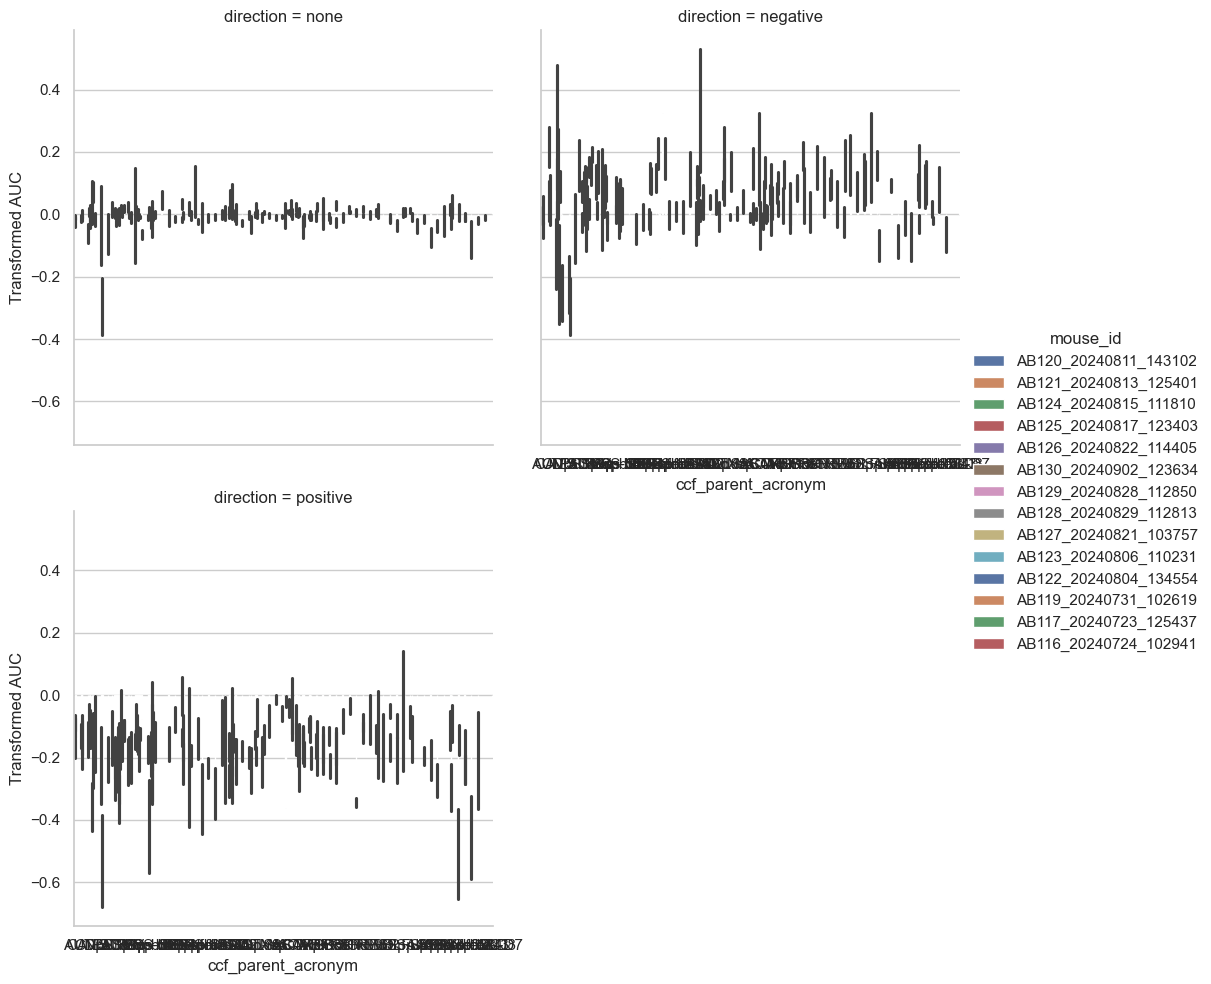

In [21]:
sns.catplot(data=overall_df, kind="bar", x="ccf_parent_acronym", y="Transformed AUC", hue="mouse_id", col="direction", col_wrap=2, height=5, palette="deep")
plt.show()


/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_74032/3525790849.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  g = sns.catplot(


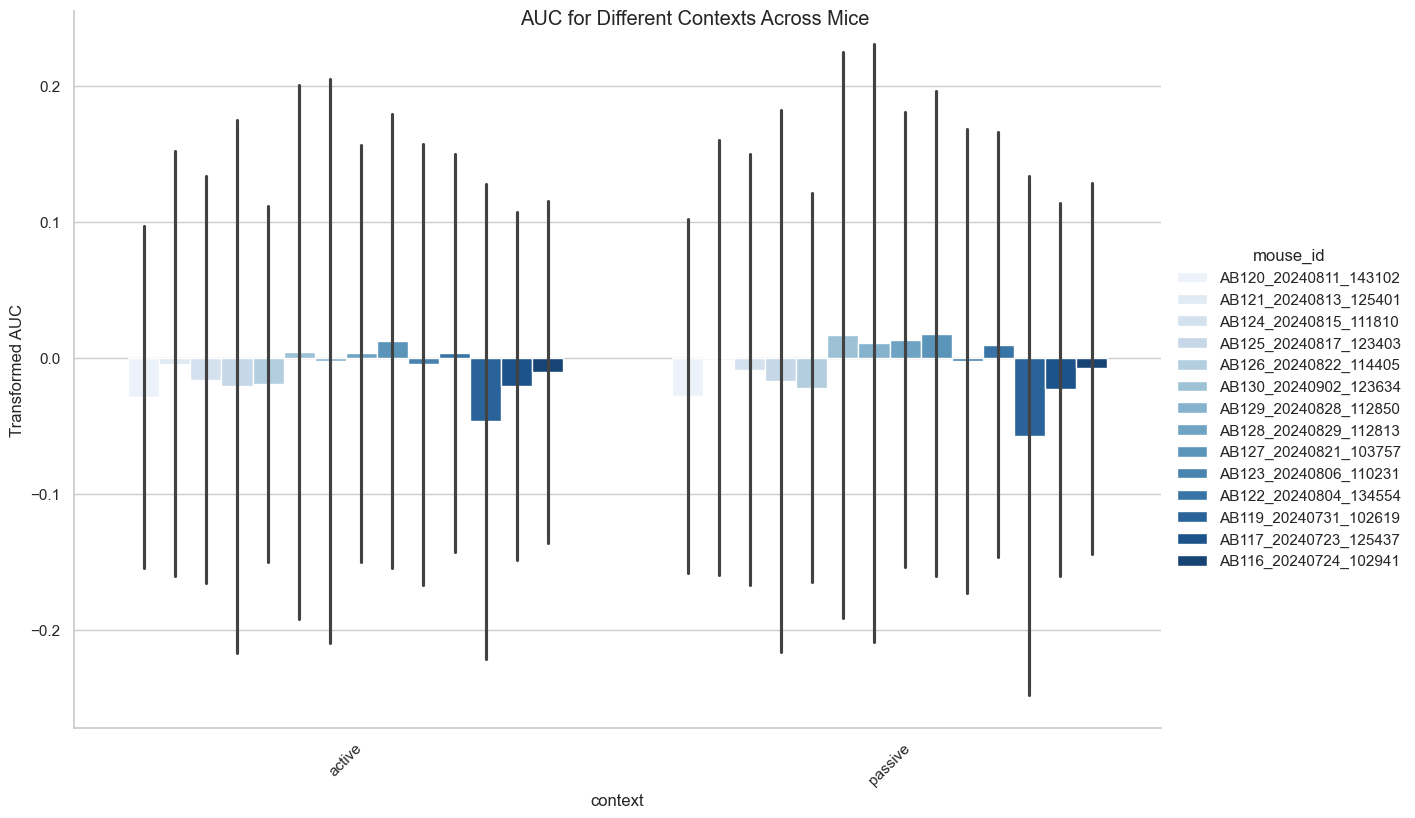

In [22]:
g = sns.catplot(
    data=overall_df, kind='bar', x='context', y='Transformed AUC', hue='mouse_id',
    ci='sd', palette='Blues', height=8, aspect=1.5  # Height in inches, aspect ratio for width
)
g.fig.suptitle('AUC for Different Contexts Across Mice')
g.set_xticklabels(rotation=45)
plt.show()


plots : acronym (avec code envoyé), proportions de neurons significatifs -  boxplot (bar avec des points par souris) e.g boxplot (en enlevant la box), par event par context (refaire la mèeme en comparant positif et negatif (avec la hue)), active passive comparaison. iteration .

ranger par ordre décroissant 

context = A, event = W, garder les index



brainglobe heatmap :
- each acronym & its proportion


autres souris à ajouter du dataframe - et ajouter des plots (que active pour tous, ou que active pour ceux uniquement qui contiennent les passives)